<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

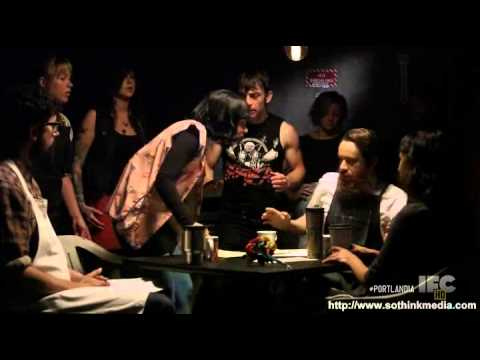

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/matthewdmeans/unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [48]:
import pandas as pd
from collections import Counter
import squarify
import matplotlib.pyplot as plt
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
import seaborn as sns

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [49]:
import re

text = shops['full_review_text'][0]
sample_token = re.sub('[^a-zA-Z 0-9]', '', text)

In [50]:
sample_token

' 11252016 1 checkin Love love loved the atmosphere Every corner of the coffee shop had its own style and there were swings I ordered the matcha latte and it was muy fantastico Ordering and getting my drink were pretty streamlined I ordered on an iPad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system I got my latte within minutes  I was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be Any ideas '

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [51]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

tokenizer = Tokenizer(nlp.vocab)

In [58]:
# take out date
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r".[0-9]+/[0-9]+/[0-9]+", '', x))

In [59]:
# tokenize the text and get count
tokens = [token.text for token in tokenizer(shops['full_review_text'][0])]
print(len(tokens))
print(tokens)

99
[' ', '1', 'check-in', 'Love', 'love', 'loved', 'the', 'atmosphere!', 'Every', 'corner', 'of', 'the', 'coffee', 'shop', 'had', 'its', 'own', 'style,', 'and', 'there', 'were', 'swings!!!', 'I', 'ordered', 'the', 'matcha', 'latte,', 'and', 'it', 'was', 'muy', 'fantastico!', 'Ordering', 'and', 'getting', 'my', 'drink', 'were', 'pretty', 'streamlined.', 'I', 'ordered', 'on', 'an', 'iPad,', 'which', 'included', 'all', 'beverage', 'selections', 'that', 'ranged', 'from', 'coffee', 'to', 'wine,', 'desired', 'level', 'of', 'sweetness,', 'and', 'a', 'checkout', 'system.', 'I', 'got', 'my', 'latte', 'within', 'minutes!', ' ', 'I', 'was', 'hoping', 'for', 'a', 'typical', 'heart', 'or', 'feather', 'on', 'my', 'latte,', 'but', 'found', 'myself', 'listing', 'out', 'all', 'the', 'possibilities', 'of', 'what', 'the', 'art', 'may', 'be.', 'Any', 'ideas?']


In [60]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', "it's", "i'm", "i've"])

In [61]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False) & (token.is_digit == False) & (token.text != re.match(r".[0-9]+/[0-9]+/[0-9]+", token.text)):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spacy_tokens'] = tokens
shops['spacy_tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [check-in, located, northcross, mall, shopping...
Name: spacy_tokens, dtype: object

In [62]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,spacy_tokens,star_rating_floats
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5.0 star rating,"[check-in, love, love, loved, atmosphere!, cor...",5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4.0 star rating,"[listed, date, night:, austin,, ambiance, aust...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4.0 star rating,"[check-in, listed, brunch, spots, loved, eclec...",4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2.0 star rating,"[cool, decor!, good, drinks, nice, seating, ho...",2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4.0 star rating,"[check-in, located, northcross, mall, shopping...",4.0


In [63]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: x[1])
shops['star_rating'] = shops['star_rating'].astype(int)

In [67]:
shops['token_length'] = shops['spacy_tokens'].apply(lambda x: len(x))

In [64]:
# organize by good rating over 3
shops['rating'] = shops['star_rating'].apply(lambda x: "good" if x > 3 else "bad")

In [65]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,spacy_tokens,star_rating_floats,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor...",5.0,good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust...",4.0,good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec...",4.0,good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...",2.0,bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping...",4.0,good


In [68]:
length_by_rating = shops.groupby("rating")['token_length'].value_counts()
length_by_rating.groupby('rating').mean()

rating
bad      8.245810
good    28.826291
Name: token_length, dtype: float64

In [69]:
length_by_rating = shops.groupby("star_rating")['token_length'].value_counts()
length_by_rating.groupby('star_rating').mean()

star_rating
1     2.527273
2     3.709677
3     5.125000
4    13.038674
5    20.322581
Name: token_length, dtype: float64

In [70]:
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [71]:
wc = count(shops['spacy_tokens'])

print(wc.shape)

wc.head()

(38645, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
133,great,2438,3250,1.0,0.008859,0.008859,0.320116
164,like,2034,2902,2.0,0.007911,0.016770,0.267069
167,good,2084,2779,3.0,0.007575,0.024346,0.273634
40,check-in,1957,1961,4.0,0.005346,0.029691,0.256959
17,love,1434,1806,5.0,0.004923,0.034614,0.188288


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [88]:
wc_good['good_freq'] = (wc_good['count']/wc_good['count'].sum())
wc_bad['bad_freq'] = (wc_bad['count']/wc_bad['count'].sum())
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq
133,great,2174,2902,1.0,0.010172,0.010172,0.354072,0.010172
310,good,1643,2180,2.0,0.007641,0.017813,0.267590,0.007641
207,like,1486,2068,3.0,0.007248,0.025061,0.242020,0.007248
17,love,1263,1604,4.0,0.005622,0.030683,0.205700,0.005622
40,check-in,1598,1602,5.0,0.005615,0.036298,0.260261,0.005615


In [89]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_freq
8,like,548,834,1.0,0.010228,0.010228,0.371274,0.010228
11,good,441,599,2.0,0.007346,0.017574,0.298780,0.007346
190,don't,340,430,3.0,0.005274,0.022848,0.230352,0.005274
106,food,266,369,4.0,0.004525,0.027373,0.180217,0.004525
70,check-in,359,359,5.0,0.004403,0.031776,0.243225,0.004403


In [83]:
a = (shops['rating'] == 'good')
b = (shops['rating'] == 'bad')
good_shops = shops[a]
bad_shops = shops[b]

In [84]:
wc_good = count(good_shops['spacy_tokens'])
wc_bad = count(bad_shops['spacy_tokens'])

print(wc_good.shape, wc_bad.shape)

(32657, 7) (15491, 7)


In [85]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
133,great,2174,2902,1.0,0.010172,0.010172,0.354072
310,good,1643,2180,2.0,0.007641,0.017813,0.267590
207,like,1486,2068,3.0,0.007248,0.025061,0.242020
17,love,1263,1604,4.0,0.005622,0.030683,0.205700
40,check-in,1598,1602,5.0,0.005615,0.036298,0.260261


In [86]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,like,548,834,1.0,0.010228,0.010228,0.371274
11,good,441,599,2.0,0.007346,0.017574,0.298780
190,don't,340,430,3.0,0.005274,0.022848,0.230352
106,food,266,369,4.0,0.004525,0.027373,0.180217
70,check-in,359,359,5.0,0.004403,0.031776,0.243225


In [90]:
wc = pd.merge(wc, wc_good[['word', 'good_freq']], how = 'left', on = 'word')
wc = pd.merge(wc, wc_bad[['word', 'bad_freq']], how = 'left', on = 'word')

In [91]:
wc['good_freq'] = wc['good_freq'].fillna(0)
wc['bad_freq'] = wc['bad_freq'].fillna(0)
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq,bad_freq
38640,actuality.,1,1,38641.0,0.000003,0.999989,0.000131,0.000004,0.0
38641,crass.,1,1,38642.0,0.000003,0.999992,0.000131,0.000004,0.0
38642,restrictions.,1,1,38643.0,0.000003,0.999995,0.000131,0.000004,0.0
38643,"specially,",1,1,38644.0,0.000003,0.999997,0.000131,0.000004,0.0
38644,"digestion,",1,1,38645.0,0.000003,1.000000,0.000131,0.000004,0.0


In [92]:
wc['freq_diff'] = abs(wc['good_freq'] - wc['bad_freq'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq,bad_freq,freq_diff
0,great,2438,3250,1.0,0.008859,0.008859,0.320116,0.010172,0.004268,0.005904
1,like,2034,2902,2.0,0.007911,0.016770,0.267069,0.007248,0.010228,0.002980
2,good,2084,2779,3.0,0.007575,0.024346,0.273634,0.007641,0.007346,0.000295
3,check-in,1957,1961,4.0,0.005346,0.029691,0.256959,0.005615,0.004403,0.001212
4,love,1434,1806,5.0,0.004923,0.034614,0.188288,0.005622,0.002477,0.003145


In [93]:
top_ten_diff = wc[['word', 'freq_diff', 'good_freq', 'bad_freq']].nlargest(10, 'freq_diff')
top_ten_diff

,word,freq_diff,good_freq,bad_freq
0,great,0.005904,0.010172,0.004268
4,love,0.003145,0.005622,0.002477
1,like,0.002980,0.007248,0.010228
15,best,0.002948,0.003831,0.000883
23,check-ins,0.002033,0.003260,0.001226
170,asked,0.001952,0.000428,0.002379
17,friendly,0.001948,0.003554,0.001607
46,delicious,0.001910,0.002327,0.000417
38,didn't,0.001892,0.001689,0.003581
6,don't,0.001891,0.003382,0.005274


In [94]:
top_ten_diff.set_index('word')

,freq_diff,good_freq,bad_freq
word,,,
great,0.005904,0.010172,0.004268
love,0.003145,0.005622,0.002477
like,0.002980,0.007248,0.010228
best,0.002948,0.003831,0.000883
check-ins,0.002033,0.003260,0.001226
asked,0.001952,0.000428,0.002379
friendly,0.001948,0.003554,0.001607
delicious,0.001910,0.002327,0.000417
didn't,0.001892,0.001689,0.003581


<AxesSubplot:>

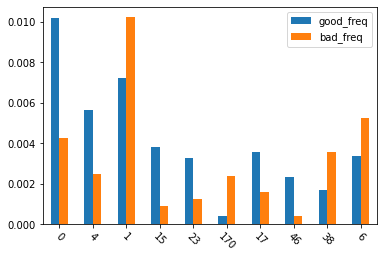

In [95]:
top_ten_diff[['good_freq', 'bad_freq']].plot.bar(rot= -45)

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

